# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

In [83]:
!pip install xlwings

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [8]:
import xlwings as xw

# Открываем книгу
wb = xw.Book('себестоимостьА_в1.xlsx')

# Выбираем нужный лист
sheet = wb.sheets['Рецептура']

# Инициализируем список для хранения сумм
costs = []
# Перебираем столбцы с G по O
for row in range(7, 11):
    # Сумма для текущего столбца
    total = 0.0
    for col in ['G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']:
        # Получаем значение ячейки
        value = sheet.range(col + str(row)).value
        # Проверяем на пустоту и преобразуем в число
        if value is None:
            value = 0.0
        total += value * sheet.range(col + str(14)).value
    # Добавляем сумму в список
    costs.append(round(total, 3))

# Выводим список сумм
print("Суммы себестоимости:")
print(costs)

# Закрываем книгу
wb.close()

Суммы себестоимости:
[21.48, 16.525, 17.423, 18.085]


2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [9]:
wb = xw.Book('себестоимостьА_в1.xlsx')

# Выбираем нужный лист
sht = wb.sheets['Рецептура']
sht.range('T4').value = 'Cебестоимость продуктов'
sht.range('T7').value = costs[0]
sht.range('T8').value = costs[1]
sht.range('T9').value = costs[2]
sht.range('T10').value = costs[3]

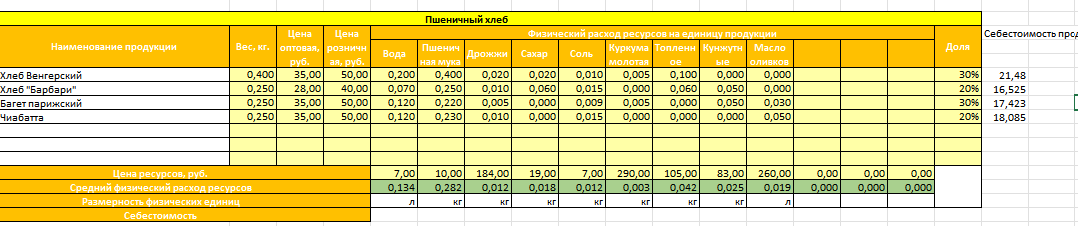

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [10]:
xw.sheets[0].activate()
xw.Range('B3:T3').merge()
xw.Range('T4:T6').merge() # Объединение ячеек
# Задание цвета (желтый)
xw.Range('B3:T3').color = (255, 255, 0)
# Задание цвета (оранжевый)
xw.Range('T4:T6').color = (255, 192, 0)
# Задание цвета (светло-желтый)
xw.Range('T7:T13').color = (255, 255, 167)
# Выравнивание текста по горизонтали для объединенных ячеек от B3 до T3
xw.Range('B3:T3').HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
# Выравнивание текста по вертикали для объединенных ячеек от B3 до T3
xw.Range('B3:T3').VerticalAlignment = xw.constants.VAlign.xlVAlignCenter
xw.Range('T4:T6').HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
xw.Range('T4:T6').VerticalAlignment = xw.constants.VAlign.xlVAlignCenter
# Задание белого цвета текста
xw.Range('T4:T6').api.Font.Color = xw.utils.rgb_to_int((255, 255, 255))
# Задание жирного начертания для текста
xw.Range('T4:T6').api.Font.Bold = True
xw.Range('B3:T3').api.Font.Bold = True
# Установка ширины столбца на основе длины значения в столбце T от 4 строки до 13
rng = xw.Range('T4:T13')
rng.columns[0].column_width = len(rng.value[0])
# column_width устанавливает ширину столбца в таблице
# rng.value[0] возвращает значение в столбце T

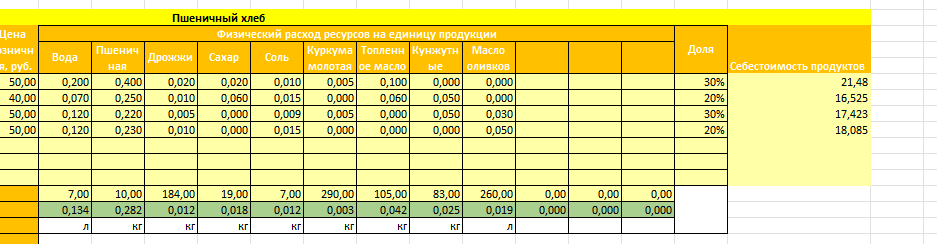

Как быстро определить параметры цвета в Excel:

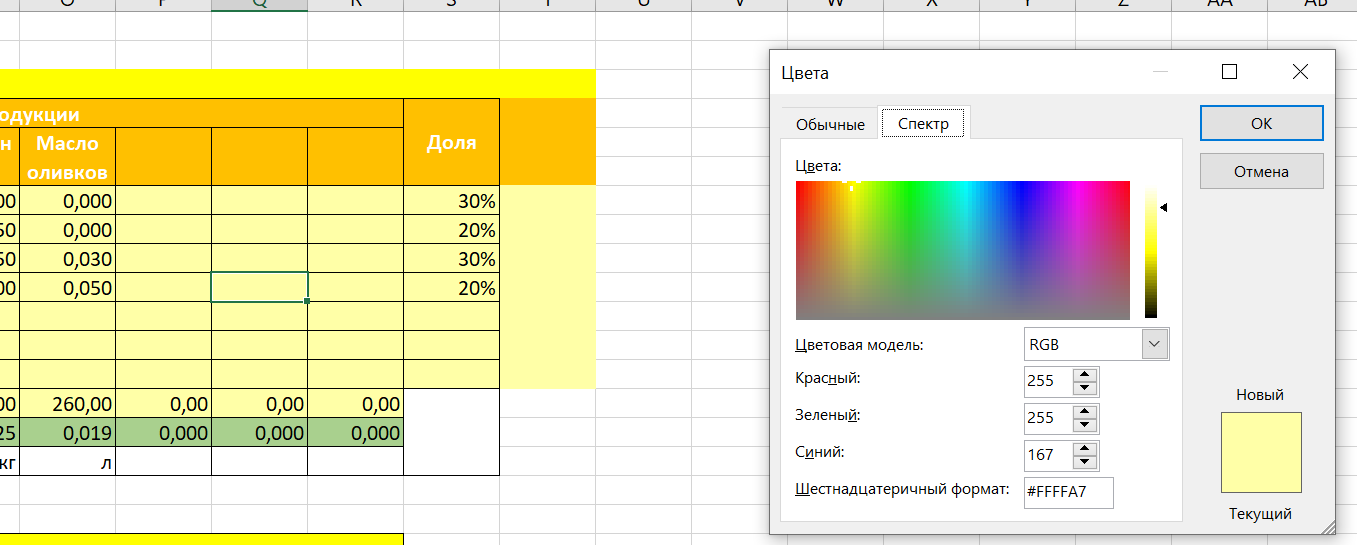

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [11]:
import pandas as pd

# Загрузка данных об отзывах
reviews = pd.read_csv('reviews_sample.csv', index_col=0)

# Загрузка данных о рецептах, выбор нужных столбцов
recipes = pd.read_csv('recipes_sample.csv', usecols=['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'])

# Проверяем загруженные данные
display(reviews)
display(recipes)


,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [12]:
reviews_sample = reviews.sample(frac=0.05)
recipes_sample = recipes.sample(frac=0.05)
# В этом коде recipes.sample(frac=0.05) функция sample() используется для случайной выборки набора данных recipes
# Параметр frac=0.05 указывает, что нужно выбрать случайные 5% строк из набора данных recipes

# Использование ExcelWriter для сохранения в один файл с разными листами
with pd.ExcelWriter('recipes.xlsx') as writer:
    recipes_sample.to_excel(writer, sheet_name='Рецепты')
    # sheet_name определяет имя листа
    reviews_sample.to_excel(writer, sheet_name='Отзывы')

# Проверяем, что программа выполнилась до конца:
print("Файл 'recipes.xlsx' успешно сохранен.")

Файл 'recipes.xlsx' успешно сохранен.


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [13]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Определение количества строк в документе, чтобы знать, куда вставлять данные
row_count = sheet.range('A1').current_region.last_cell.row
# .current_region.last_cell.row возвращает номер последней заполненной строки

# Генерация данных для нового столбца (время выполнения в секундах)
# Примечание: Excel начинает счет с 1, и мы пропускаем заголовок, так что начинаем с 2-й строки
minutes = sheet.range(f'D2:D{row_count}').value 
seconds_assign = [x * 60 for x in minutes] # перевод в секунды из минут

# Запись данных в новый столбец, следующий за последним столбцом с данными
last_col = sheet.range('A1').current_region.last_cell.column
new_col_address = xw.utils.col_name(last_col + 1) + '1'  # Определение адреса нового столбца для заголовка
# .utils.col_name используется для получения буквенного обозначения для указанного номера столбца

# Установка заголовка для нового столбца
sheet.range(new_col_address).value = 'seconds_assign'

# Запись вычисленных значений в новый столбец
sheet.range(new_col_address).offset(1,0).options(transpose=True).value = seconds_assign
# Функция .offset(1, 0) используется для перемещения на одну строку вниз относительно текущей ячейки в таблице
'''Первое число (в данном случае 1) указывает смещение по вертикали (строки вниз), 
а второе число (в данном случае 0) указывает смещение по горизонтали (без смещения по горизонтали)'''
# .options(transpose=True) применяется к диапазону данных и позволяет транспонировать данные 

wb.save()
wb.close()


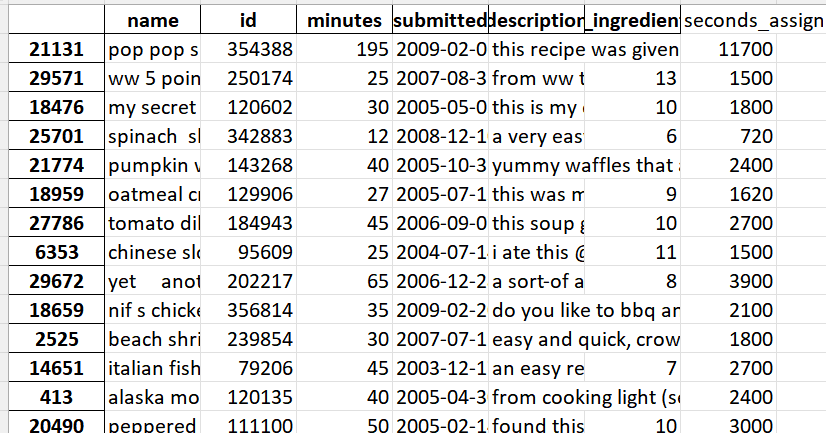

Другое решение:

In [74]:
wb = xw.Book('recipes.xlsx')
sht1 = wb.sheets['Рецепты']
sht2 = wb.sheets['Отзывы']

# берем значения из столбца minutes и передаем в новый столбец
sht1.range('G2').options(transpose=True).value = [float(val)*60 for val in sht1.range('C2').expand('down').value]
# .expand('down') используется для расширения диапазона данных вниз от заданной ячейки до ближайшей пустой ячейки в столбце.
sht1.range('G1').value = 'seconds_assign'

wb.save()
wb.close()

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [75]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Определение номера последнего столбца с данными
last_col = sheet.range('A1').current_region.last_cell.column
# метод .last_cell.column возвращает номер последнего столбца в текущем диапазоне ячеек
new_col_letter = xw.utils.col_name(last_col + 1)  # Получаем букву для нового столбца

# Определение количества строк (включая заголовок)
row_count = sheet.range('A1').current_region.last_cell.row

# Установка заголовка для нового столбца
sheet.range(f'{new_col_letter}1').value = 'seconds_formula'

# Применение формулы Excel для каждой ячейки в новом столбце
# Формула будет умножать значение из столбца минут (D) на 60 для преобразования в секунды
for row in range(2, row_count + 1):
    sheet.range(f'{new_col_letter}{row}').formula = f'=D{row}*60'

wb.save()
wb.close()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [14]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Форматирование столбцов H и I:
for col in ['H', 'I']:
    # Получение объекта диапазона для всего столбца
    col_range = sheet.range(f'{col}:{col}')

    # Назначение полужирного стиля для названия столбца
    col_range.api.Font.Bold = True

    # Выравнивание по центру ячеек
    col_range.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

wb.save()
wb.close()

Другое решение (без циклов):

In [77]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

sheet.range('G1:H1').api.Font.Bold = True  # Делаем текст полужирным
sheet.range('G1:H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter  # Выравниваем по центру

wb.save()
wb.close()

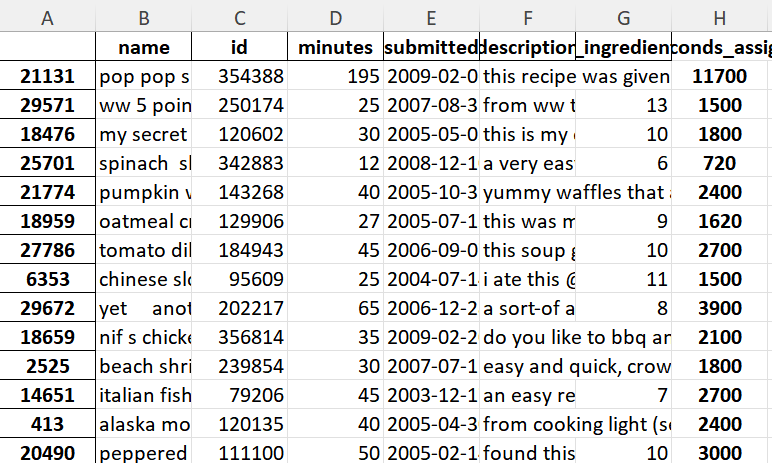

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [15]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Получение объекта диапазона столбца минут (D)
start_cell = sheet.range('D2')
end_cell = start_cell.end('down')  # Определение последней заполненной ячейки в столбце
minutes_range = sheet.range(start_cell, end_cell)

# Применение условного форматирования
for cell in minutes_range:
    # Получение значения ячейки
    value = cell.value
    if value < 5:
        color = (0, 255, 0)  # Зеленый
    elif 5 <= value <= 10:
        color = (255, 255, 0)  # Желтый
    else:
        color = (255, 0, 0)  # Красный

    # Применение цвета фона к ячейке
    cell.color = color

wb.save()
wb.close()

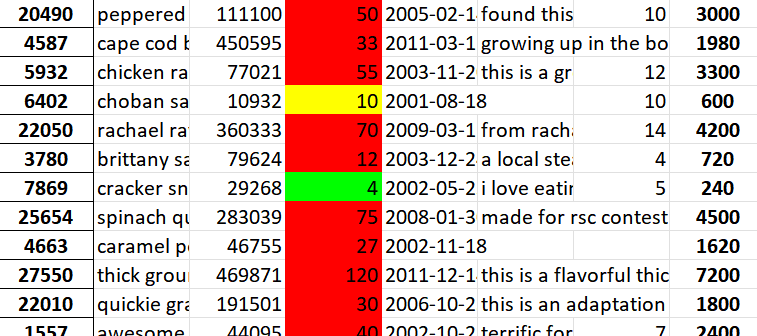

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [16]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Определение номера последнего столбца с данными
last_col = sheet.range('A1').current_region.last_cell.column
new_col_letter = xw.utils.col_name(last_col + 1)  # Получаем букву для нового столбца

# Определение количества строк (включая заголовок)
row_count = sheet.range('A1').current_region.last_cell.row

# Установка заголовка для нового столбца
sheet.range(f'{new_col_letter}1').value = 'n_reviews'

# Применение формулы Excel для каждой ячейки в новом столбце
for row in range(2, row_count + 1):
    recipe_id = sheet.range(f'A{row}').value  # id рецепта находится в столбце A
    # Используем формулу Excel для подсчета количества отзывов для данного рецепта
    formula = f'=COUNTIF(Отзывы!A:A, {recipe_id})'  # Список id рецептов находится на листе "Отзывы" в столбце A
    sheet.range(f'{new_col_letter}{row}').formula = formula

wb.save()
wb.close()

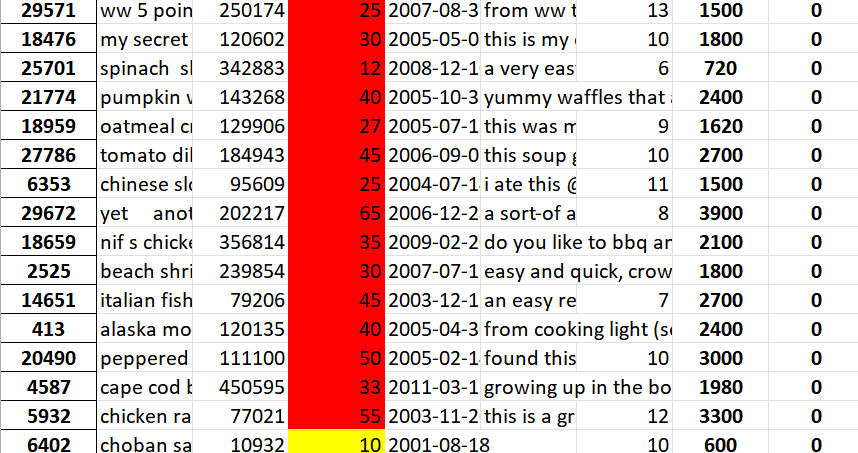

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [18]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

def validate(file_path):
    wb = load_workbook(file_path)
    # Метод load_workbook загружает файл книги Excel для последующей работы с ним
    sheet_reviews = wb['Отзывы']
    sheet_recipes = wb['Рецепты']

    # Устанавливаем красный цвет заливки
    red_fill = PatternFill(start_color='FF0000', end_color='FF0000', fill_type='solid')
    # Метод PatternFill позволяет задать заливку ячеек определенным узором или цветом.

    # Перебираем строки листа Отзывы и проверяем правила
    for idx, row in enumerate(sheet_reviews.iter_rows(min_row = 2, values_only = True), start = 2):
        '''Метод .iter_rows(min_row=2, values_only=True) из библиотеки openpyxl используется для 
        итерации по строкам указанного листа Excel, начиная с заданной строки (в данном случае с 2 строки)
        Параметр values_only=True указывает на то, что при итерации нужно получать только значения ячеек, а не объекты ячеек'''
        recipe_id, rating = row[0], row[1]
        if not (0 <= rating <= 5):
            # Если рейтинг не в диапазоне от 0 до 5, выделяем строку красным
            for cell in sheet_reviews.iter_rows(min_row = idx, max_row = idx, min_col = 1, max_col = len(row)):
                '''min_row=idx: Этот параметр указывает начальную строку для итерации
                   max_row=idx: Этот параметр указывает конечную строку для итерации
                   min_col=1: Этот параметр указывает начальный столбец для итерации. Здесь мы начинаем с первого столбца
                   max_col=len(row): Этот параметр указывает конечный столбец для итерации'''
                for c in cell:
                    c.fill = red_fill
                    # .fill определяет заливку ячейки
        elif recipe_id not in {recipe[0] for recipe in sheet_recipes.iter_rows(min_row = 2, max_col = 1, values_only = True)}:
            # Если рецепт отсутствует на листе Рецепты, выделяем строку красным
            for cell in sheet_reviews.iter_rows(min_row = idx, max_row = idx, min_col = 1, max_col = len(row)):
                for c in cell:
                    c.fill = red_fill

    wb.save(file_path)

# Пример использования функции
validate('recipes.xlsx')

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [81]:
import csv 

recipes_model = []  # Создаем пустой список для хранения данных из CSV файла

# Открываем CSV файл 'recipes_model.csv' для чтения с указанием кодировки
with open('recipes_model.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')  # Создаем объект reader для чтения CSV файла с разделителем '\t' (табуляция)
    
    # Проходимся по каждой строке в CSV файле
    for row in reader:
        recipes_model.append(row)  # Добавляем каждую строку в список recipes_model

# Создаем новую книгу Excel
wb2 = xw.Book()

# Устанавливаем имя первого листа в книге Excel на 'Модель'
wb2.sheets[0].name = 'Модель'

# Записываем данные из списка recipes_model в ячейку A2 нового листа в книге Excel
xw.Range('A2').value = recipes_model

wb2.save('recipes_model.xlsx')

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
import xlwings as xw

# Открытие книги
wb = xw.Book('recipes_model.xlsx')
sheet = wb.sheets['Модель']

# Добавление формулы в столбец J
sheet.range('J2').formula = '=CONCATENATE(B2, " ", UPPER(C2))'
sheet.range('J2').api.AutoFill(sheet.range('J2:J{}'.format(sheet.cells.last_cell.row)).api, 1)

# Сохранение и закрытие книги
wb.save()
wb.close()

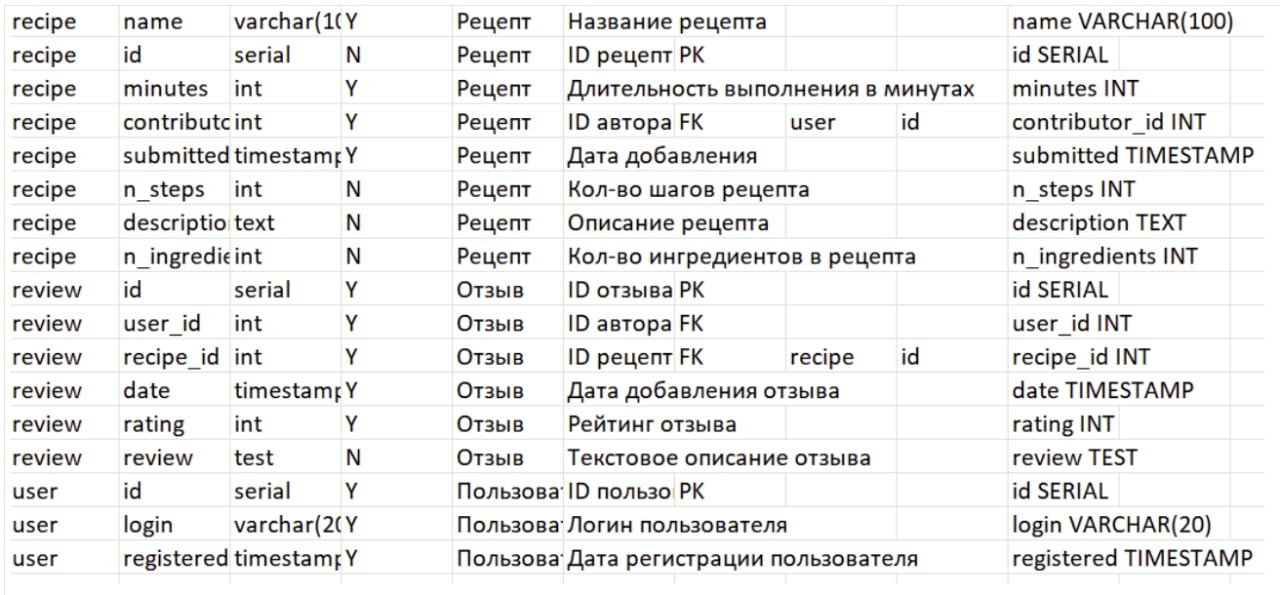

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
xw.Range('A2').expand('down').color = (0, 204, 2)
xw.Range('A2').expand().columns.autofit()
xw.Range('A2').expand('down').font.bold = True
xw.Range('A2').expand().api.AutoFilter(Field:=1)

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 